#Problem Statement and Exploratory Data Analysis

##Basic Analysis

###Problem Statement

Yulu, India’s premier micro-mobility service provider, is facing a downturn in its revenues and seeks to understand the factors influencing the demand for shared electric cycles in the Indian market. To address this, the company has enlisted the help of a consulting firm. The primary objective is to identify the significant variables that predict the demand for shared electric cycles and evaluate how effectively these variables explain the fluctuations in demand. This investigation aims to provide insights into the key drivers of demand for Yulu's services, enabling informed decision-making to revitalize its revenue streams and sustainably cater to the commuting needs of Indian consumers.







###Project Setup

Importing necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset


In [20]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')


###Observatory Data Analysis

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


###Conversion of Categorical Variables

In [6]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

##Univariate Analysis

###Distribution plots for continuous variables

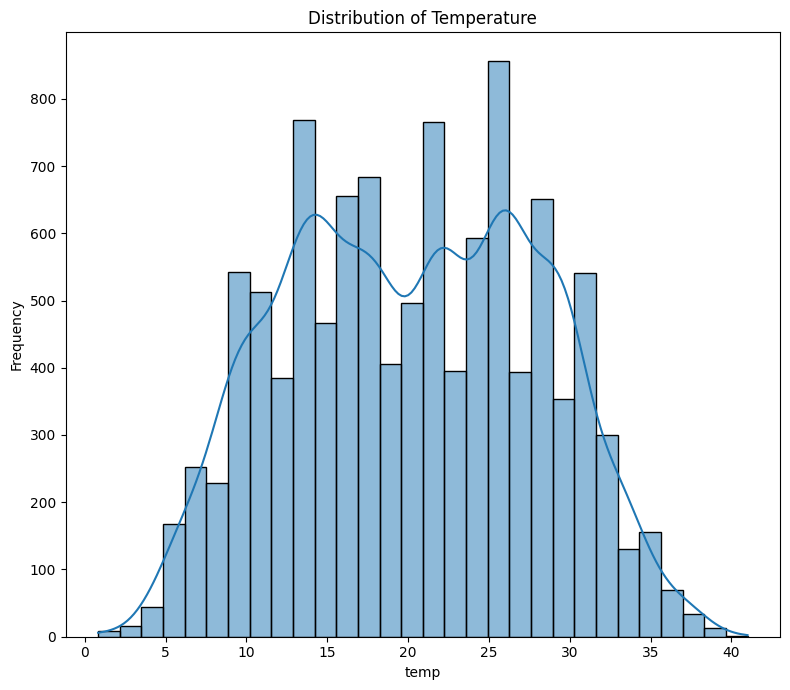

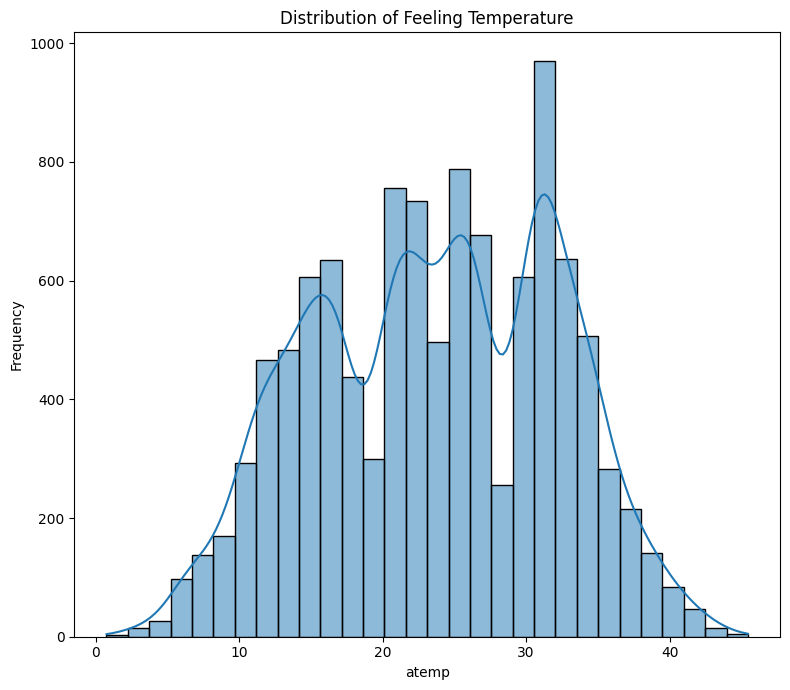

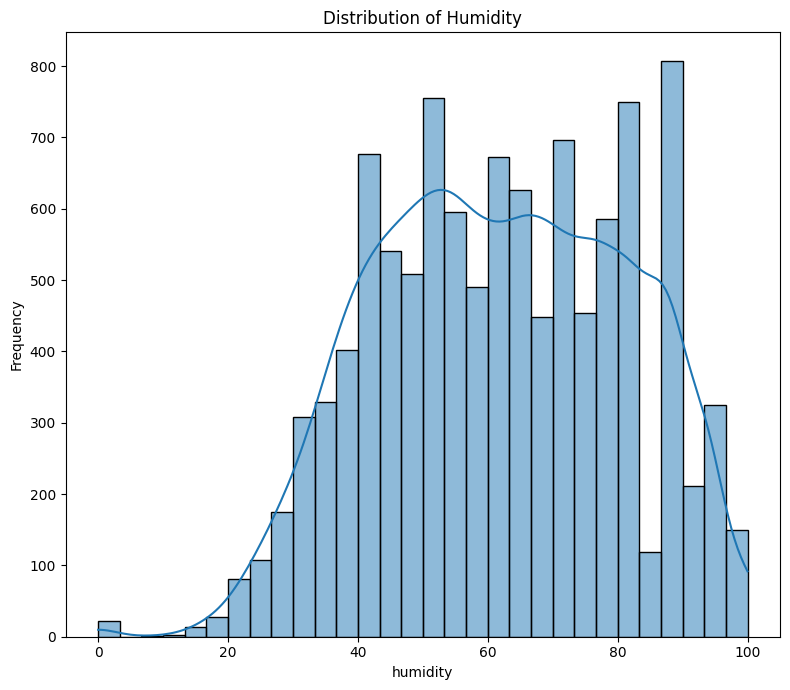

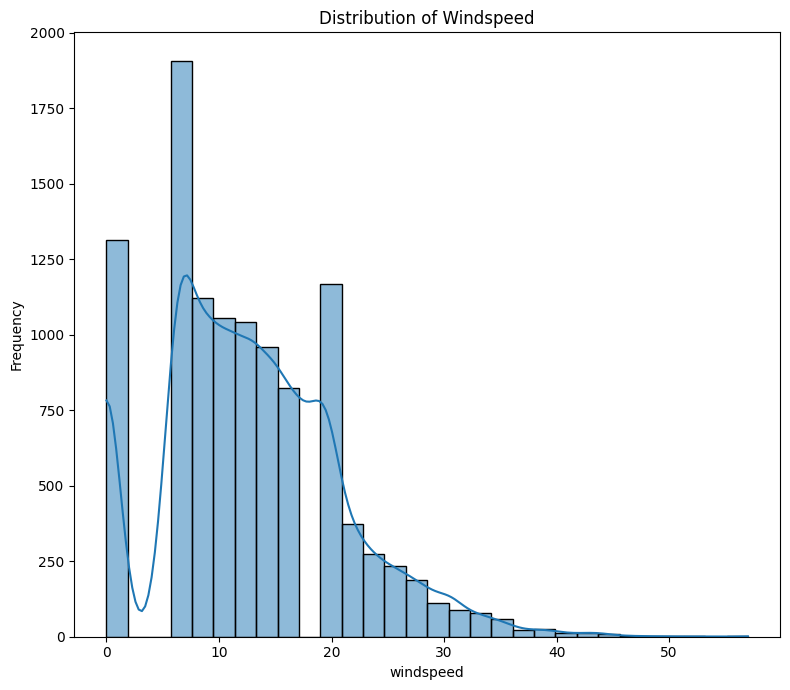

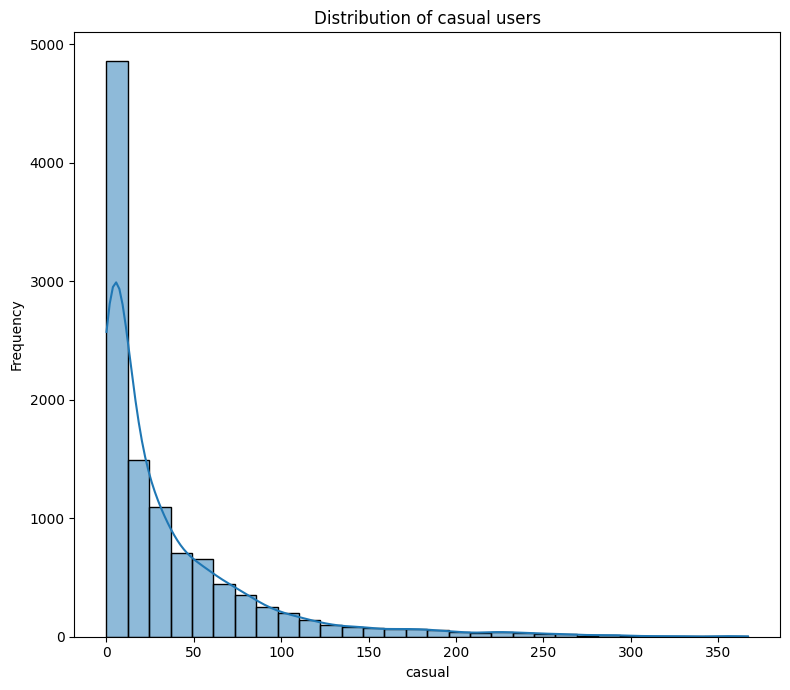

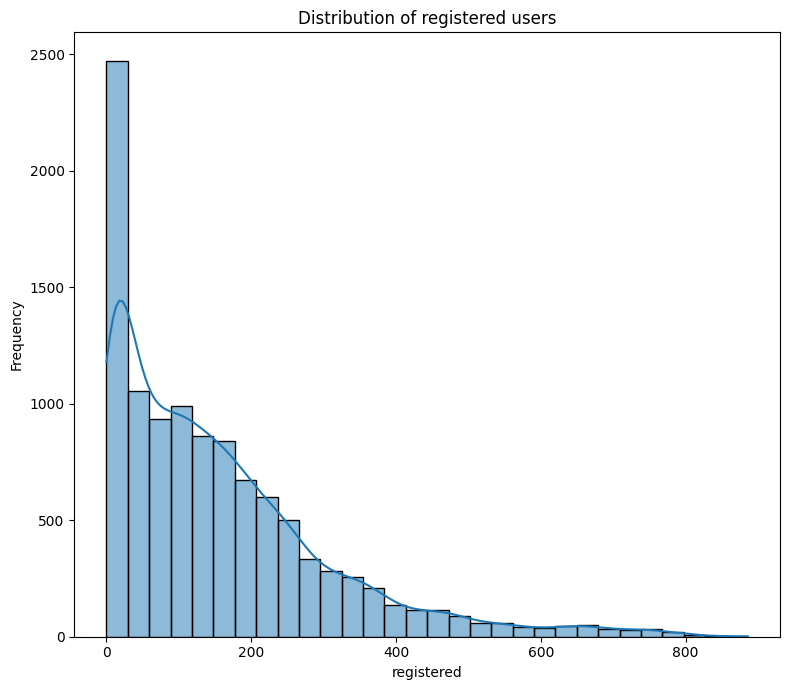

In [9]:
def plot_distribution(data, column, title):
    plt.figure(figsize=(8, 7))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_distribution(df, 'temp', 'Distribution of Temperature')
plot_distribution(df, 'atemp', 'Distribution of Feeling Temperature')
plot_distribution(df, 'humidity', 'Distribution of Humidity')
plot_distribution(df, 'windspeed', 'Distribution of Windspeed')
plot_distribution(df, 'casual', 'Distribution of casual users')
plot_distribution(df, 'registered', 'Distribution of registered users')

###BarPlots for Categorical Variables

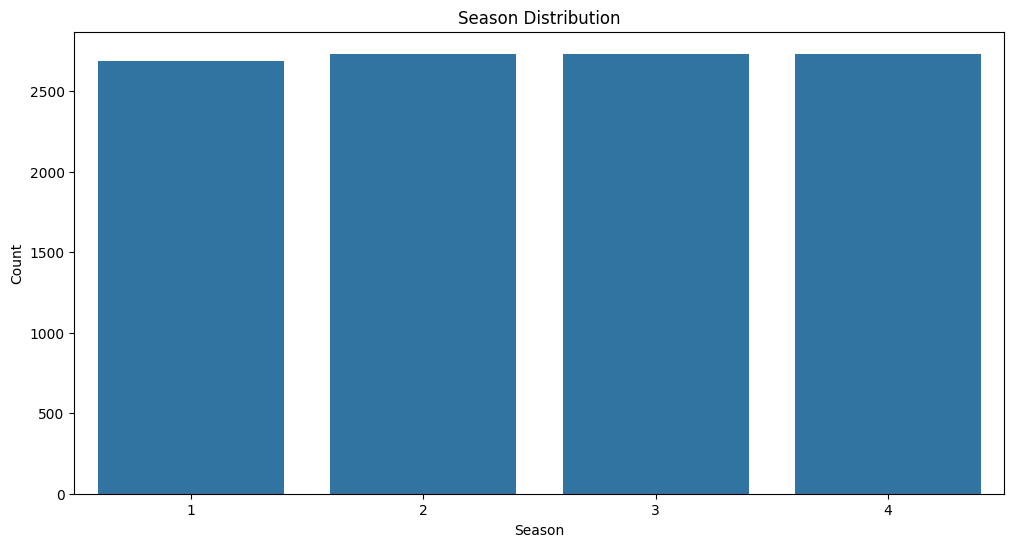

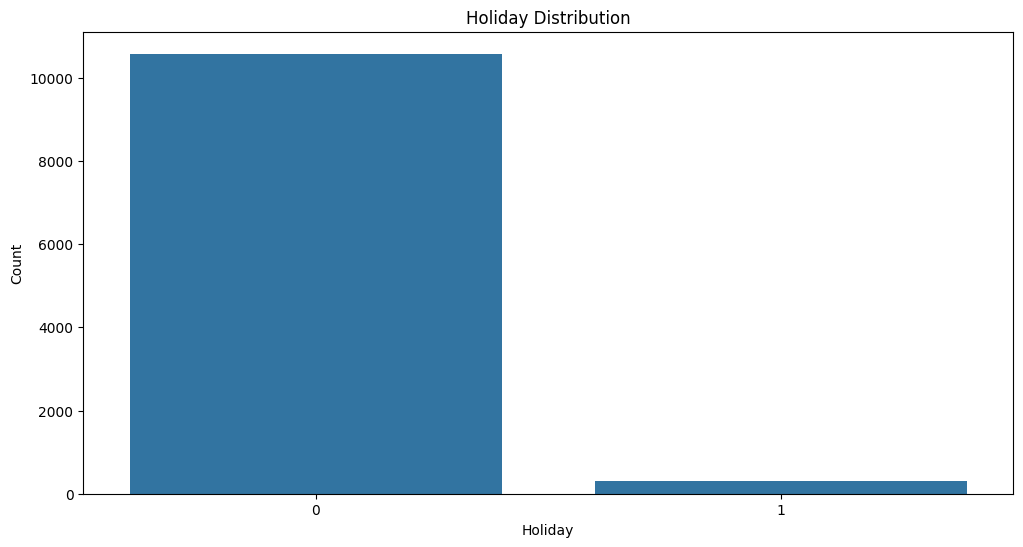

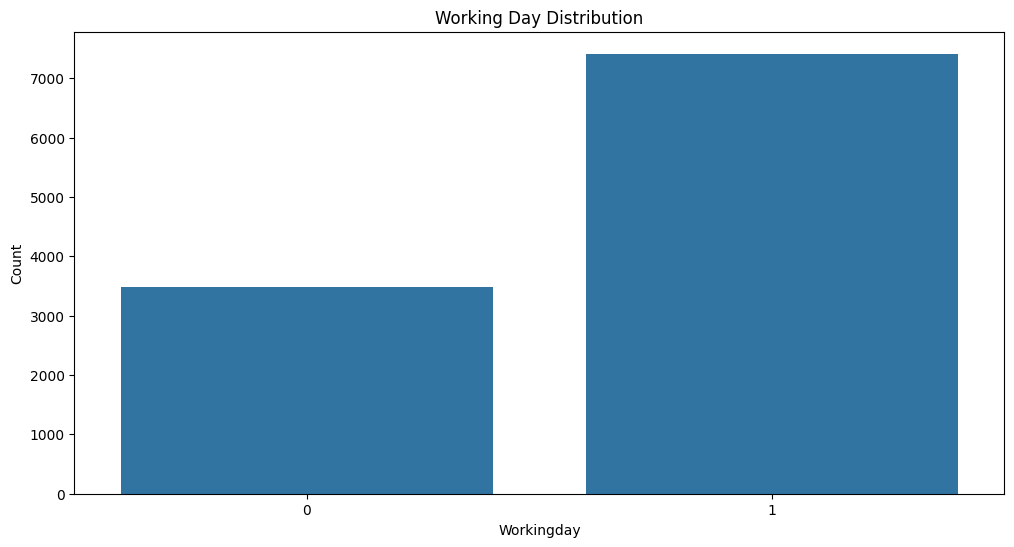

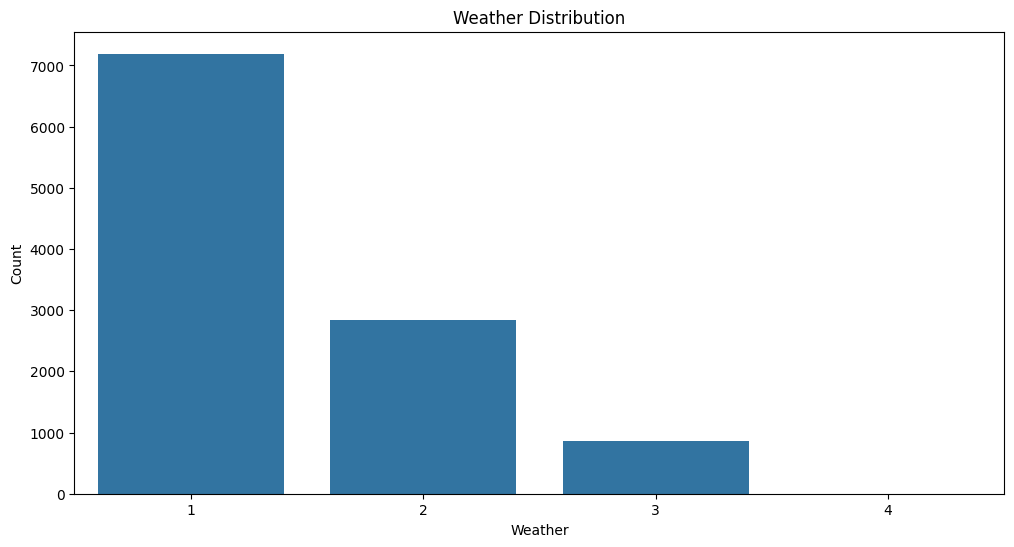

In [10]:

def plot_count_distribution(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column)
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

plot_count_distribution(df, 'season', 'Season Distribution')
plot_count_distribution(df, 'holiday', 'Holiday Distribution')
plot_count_distribution(df, 'workingday', 'Working Day Distribution')
plot_count_distribution(df, 'weather', 'Weather Distribution')

##Bivariate Analysis

###Relationship b/w Workday and count

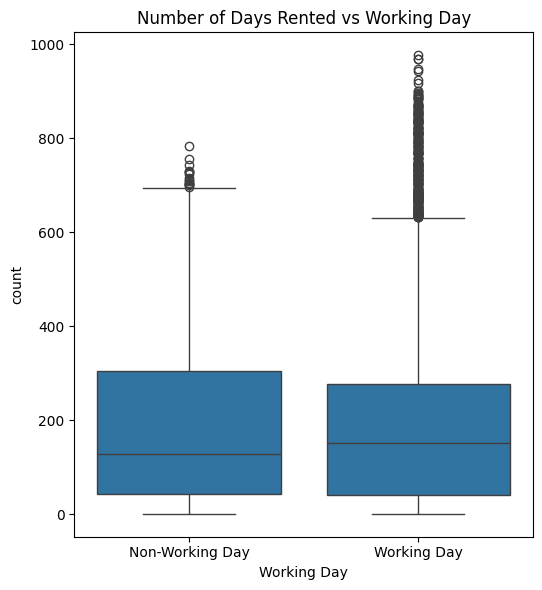

In [22]:
# Mapping labels for working day categories
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
df['Working Day'] = df['workingday'].map(workingday_labels)

# Plotting boxplot for count vs working day
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Working Day', y='count')
plt.title('Number of Days Rented vs Working Day')

# Adjusting layout
plt.tight_layout()
plt.show()

###Relationship b/w Season and count

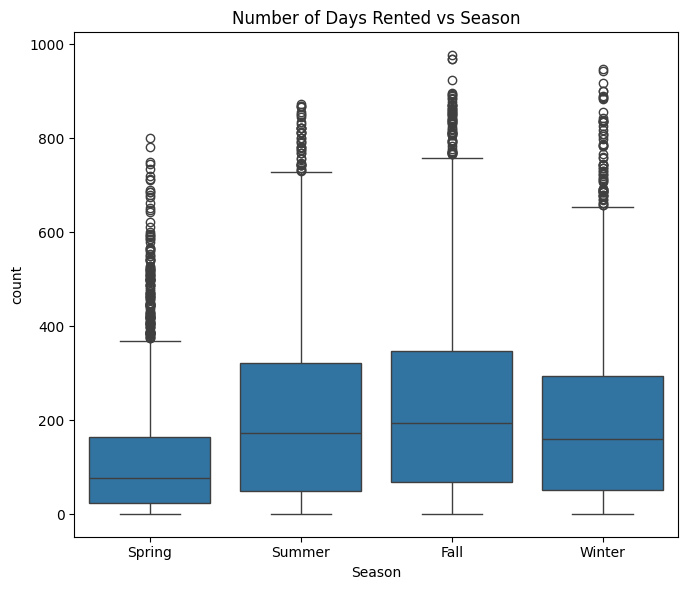

In [27]:
# Mapping labels for season categories
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['Season'] = df['season'].map(season_labels)

# Plotting boxplot for count vs season
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Season', y='count')
plt.title('Number of Days Rented vs Season')

# Adjusting layout
plt.tight_layout()
plt.show()

###Relationship b/w Weather and Count

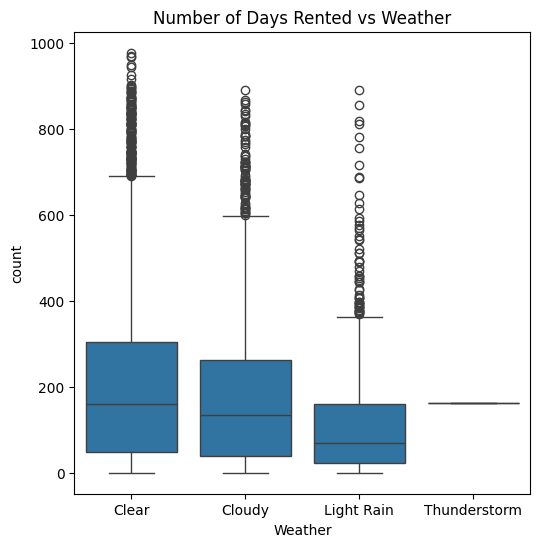

In [28]:
# Mapping labels for weather categories
weather_labels = {1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Thunderstorm'}
df['Weather'] = df['weather'].map(weather_labels)

# Plotting boxplot for count vs weather
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Weather', y='count')
plt.title('Number of Days Rented vs Weather')

# Adjusting layout

plt.show()

#Hypothesis Testing

##2-Sample T test

We are performing a 2-Sample T test to check if Working Day has an effect on the number of electric cycles rented

**Null Hypothesis:** Working days have no effect on number of cycles being rented

**Alternate Hypothesis:** Working days affect the number of cycles being rented

Alpha: 0.05

In [11]:
from scipy.stats import ttest_ind, f_oneway

In [13]:
# Separate counts for working days and non-working days
count_workingday = df[df['workingday'] == 1]['count']
count_non_workingday = df[df['workingday'] == 0]['count']

# Perform 2-sample T-Test
t_statistic, p_value_ttest = ttest_ind(count_workingday, count_non_workingday)

# Print T-Test results
print(f'2-Sample T-Test for checking if working days affect no. of cycles rented:\nT-Statistic: {t_statistic}\nP-Value: {p_value_ttest}')

# Set significance level
alpha = 0.05

# Interpret the results based on the p-value
if p_value_ttest > alpha:
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest that the mean number of cycles rented is different across working and non-working days.")
else:
    print("We reject the null hypothesis. There is significant evidence to suggest number of cycles rented is different on working days and non-working days.")


2-Sample T-Test for checking if working days affect no. of cycles rented:
T-Statistic: 1.2096277376026694
P-Value: 0.22644804226361348
We fail to reject the null hypothesis. There is not enough evidence to suggest that the mean number of cycles rented is different across working and non-working days.


##ANOVA

###Checking if No. of cycles rented is similar or different in different WEATHER

**Null Hypothesis:** Number of cycles being rented is similar in different weather.

**Alternate Hypothesis:** Number of cycles being rented is different in different weather.

Alpha: 0.05

We will use ANOVA to test the above hypothesis

In [14]:
# Separate counts for each weather category
weather_counts = [df[df['weather'] == weather]['count'] for weather in df['weather'].unique()]

# Perform one-way ANOVA test
f_statistic, p_value_anova = f_oneway(*weather_counts)

# Print ANOVA results
print(f'\nANOVA for Weather vs Count:')
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value_anova}')

# Set significance level
alpha = 0.05

# Interpret the results based on the p-value
if p_value_anova > alpha:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that the mean number of cycles rented is different across weather categories.")
else:
    print("Reject the null hypothesis: There is significant evidence to suggest that the mean number of cycles rented differs across at least one pair of weather categories.")



ANOVA for Weather vs Count:
F-Statistic: 65.53024112793271
P-Value: 5.482069475935669e-42
Reject the null hypothesis: There is significant evidence to suggest that the mean number of cycles rented differs across at least one pair of weather categories.


###Checking if No. of cycles rented is similar or different in different SEASONS

**Null Hypothesis:** Number of cycles being rented is similar in different seasons.

**Alternate Hypothesis:** Number of cycles being rented is different in different seasons.

Alpha: 0.05

We will use ANOVA to test the above hypothesis

In [15]:
# Separate counts for each season category
season_counts = [df[df['season'] == season]['count'] for season in df['season'].unique()]

# Perform one-way ANOVA test
f_statistic_season, p_value_anova_season = f_oneway(*season_counts)

# Print ANOVA results
print(f'\nANOVA for Season vs Count:')
print(f'F-Statistic: {f_statistic_season}')
print(f'P-Value: {p_value_anova_season}')

# Set significance level
alpha = 0.05

# Interpret the results based on the p-value
if p_value_anova_season > alpha:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that the mean number of cycles rented is different across seasons.")
else:
    print("Reject the null hypothesis: There is significant evidence to suggest that the mean number of cycles rented differs across at least one pair of seasons.")



ANOVA for Season vs Count:
F-Statistic: 236.94671081032106
P-Value: 6.164843386499654e-149
Reject the null hypothesis: There is significant evidence to suggest that the mean number of cycles rented differs across at least one pair of seasons.


##Chi-Square Test

**Null Hypothesis:** Weather is independent of the season.

**Alternate Hypothesis:** Weather is not independent of the season.

Alpha: 0.05

We use Chi-Square Test for the above hypothesis

In [16]:
from scipy.stats import chi2_contingency


In [17]:
# Create contingency table for Weather vs Season
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform Chi-Square test
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

# Print Chi-Square test results
print(f'\nChi-Square Test for Weather vs Season:')
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_value_chi2}')

# Set significance level
alpha = 0.05

# Interpret the results based on the p-value
if p_value_chi2 > alpha:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that weather and season are dependent")
else:
    print("Reject the null hypothesis: There is significant evidence to suggest that weather and season are dependent on each other.")



Chi-Square Test for Weather vs Season:
Chi-Square Statistic: 49.15865559689363
P-Value: 1.5499250736864862e-07
Reject the null hypothesis: There is significant evidence to suggest that weather and season are dependent on each other.


#Conclusion

Analysis of Yulu's data reveals valuable insights that can significantly enhance operational efficiency and marketing strategies. By delving into the seasonal trends, it becomes apparent that Fall and Summer exhibit the highest demand for shared electric cycles, while Spring experiences a decline. Leveraging this information, Yulu can strategically allocate resources and focus marketing efforts during peak seasons, thereby maximizing customer engagement and revenue generation.

Furthermore, understanding customer preferences regarding weather conditions is paramount. Clear weather emerges as the preferred choice among riders, closely followed by cloudy conditions. Capitalizing on this insight, Yulu can implement dynamic pricing strategies, such as surge pricing during cloudy days, to incentivize usage and optimize revenue streams.

An intricate analysis of the interplay between seasonality and weather patterns unveils specific combinations that drive peak demand. For instance, peak demand is observed during Fall with clear weather, Summer with clear weather, Winter with clear weather, Fall with cloudy weather, and Winter with cloudy weather. Armed with this knowledge, Yulu can implement targeted promotions and incentives tailored to these high-demand scenarios, ensuring optimal utilization of resources and enhancing user experience.

Moreover, the distinction between working days and holidays underscores the importance of tailored marketing initiatives. While there is no significant difference in demand between working and non-working days, holidays witness a surge in demand from non-registered customers. To capitalize on this trend, Yulu can devise holiday-specific loyalty campaigns and targeted advertisements to attract and retain customers during festive periods.

Additionally, the analysis highlights a strong correlation between temperature and customer count, with temperatures ranging from 17°C to 41°C demonstrating the highest potential for market expansion. Furthermore, colder seasons, characterized by temperatures between 0°C to 12°C, present untapped opportunities for targeted marketing campaigns to encourage usage and drive adoption among users.

In summary, by leveraging these comprehensive insights and recommendations derived from data analysis, Yulu can fine-tune its operational strategies and marketing initiatives to effectively cater to customer needs, enhance user experience, and drive sustainable growth in the micro-mobility sector.